In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import random
import math
from datetime import datetime

In [2]:
    # add landmarks to eyes 
    # imageLeftEye = cv2.circle(imageMouth, center=(int(center[0] - size * 0.15), int(center[1] - size * 0.1)), radius=5, color=(0, 0, 255), thickness=-1)
    # imageRightEye = cv2.circle(imageLeftEye, center=(int(center[0] + size * 0.15), int(center[1] - size * 0.1)), radius=5, color=(0, 0, 255), thickness=-1)
    # imageNose = cv2.circle(imageRightEye, center=(int(center[0]), int(center[1])), radius=5, color=(0, 0, 255), thickness=-1)
    
    # perimeter_points = []
    # print(angle)
    # if angle == 0:
    #   for i in range(0, 190, 30):
    #     x = int(mouthCenter[0] + axis1 * np.cos(np.deg2rad(i)))
    #     y = int(mouthCenter[1] + axis2 * np.sin(np.deg2rad(i)))
    #     perimeter_points.append((x, y))
    # else:
    #   for i in range (180, 370, 30):
    #     x = int(mouthCenter[0] + axis1 * np.cos(np.deg2rad(i)))
    #     y = int(mouthCenter[1] + axis2 * np.sin(np.deg2rad(i)))
    #     perimeter_points.append((x, y))
    
    # #draw the mouth
    # for i, point in enumerate(perimeter_points):
    #   imageMouth = cv2.circle(imageMouth, point, 5, (0, 0, 255), -1)
      
    # imageMouth = cv2.ellipse(img = imageNose, center = mouthCenter, 
    #                          axes = (axis1, axis2), angle = angle, startAngle = 0, 
    #                          endAngle = 180, color = (0, 0, 255), thickness = 5)

In [14]:
def add_landmarks_for_face(image, center, mouthCenter, axis1, axis2, angle, size):
    # add landmarks to eyes 
    # Calculate the coordinates of the left and right eye centers
    left_eye_center = (int(center[0] - size[0] * 0.15), int(center[1] - size[1] * 0.1))
    right_eye_center = (int(center[0] + size[0] * 0.15), int(center[1] - size[1] * 0.1))

    # imageLeftEye = cv2.circle(image, center=(int(center[0] - size * 0.15), int(center[1] - size * 0.1)), radius=5, color=(0, 0, 255), thickness=-1)
    # imageRightEye = cv2.circle(imageLeftEye, center=(int(center[0] + size * 0.15), int(center[1] - size * 0.1)), radius=5, color=(0, 0, 255), thickness=-1)
    # imageNose = cv2.circle(imageRightEye, center=(int(center[0]), int(center[1])), radius=5, color=(0, 0, 255), thickness=-1)
    imageLeftEye = cv2.circle(image, center=left_eye_center, radius=5, color=(0, 0, 255), thickness=-1)
    imageRightEye = cv2.circle(imageLeftEye, center=right_eye_center, radius=5, color=(0, 0, 255), thickness=-1)


    perimeter_points = []
    if angle == 0: # happy
      for i in range(0, 170, 30): # Half of the ellipse
        x = int(mouthCenter[0] + axis1 * np.cos(np.deg2rad(i)))
        y = int(mouthCenter[1] + axis2 * np.sin(np.deg2rad(i)))
        perimeter_points.append((x, y)) # curve points
      num_line_points = len(perimeter_points) # so flat part of the ellipse is same len as curved
      line_points = [(x, mouthCenter[1]) for x in range(mouthCenter[0] - axis1, mouthCenter[0] + axis1, int((2 * axis1)/math.floor(num_line_points)))]
      if (len(line_points) != num_line_points): ## sometimes it adds an extra point this just removes that point, its always the last one
        line_points.pop()
      mouth_points = perimeter_points + line_points 
    else:
      for i in range (180, 350, 30): # sad and other half of the ellipse
        x = int(mouthCenter[0] + axis1 * np.cos(np.deg2rad(i)))
        y = int(mouthCenter[1] + axis2 * np.sin(np.deg2rad(i)))
        perimeter_points.append((x, y))
      num_line_points = len(perimeter_points) # so flat part of the ellipse is same len as curved
      line_points = [(x, mouthCenter[1]) for x in range(mouthCenter[0] + axis1, mouthCenter[0] - axis1, -int((2 * axis1) / math.floor(num_line_points)))]
      if (len(line_points) != num_line_points): ## sometimes it adds an extra point this just removes that point, its always the last one
        line_points.pop()
      mouth_points = line_points + perimeter_points 

    # draw the mouth
    for i, point in enumerate(mouth_points):
      # cv2.putText(imageRightEye, str(i), (point[0] + 5, point[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1) # for debugging to see the order of points made 

      imageMouth = cv2.circle(imageRightEye, point, 5, (0, 0, 255), -1)
    landmarks = np.array([left_eye_center]+ [right_eye_center]+ mouth_points)

    
    return landmarks, imageMouth

In [15]:
def create_mask(lefteye, righteye, mouth, size):
    # Create a blank mask with zeros
    mask = np.zeros((size[0], size[1]), dtype=np.uint8)


    # Draw circles for the left and right eyes on the mask
    cv2.circle(mask, center=lefteye, radius=25, color=1, thickness=-1)
    cv2.circle(mask, center=righteye, radius=25, color=1, thickness=-1)
    cv2.fillPoly(mask, [mouth], color=2)

    return mask


ValueError: num must be an integer with 1 <= num <= 9, not 10

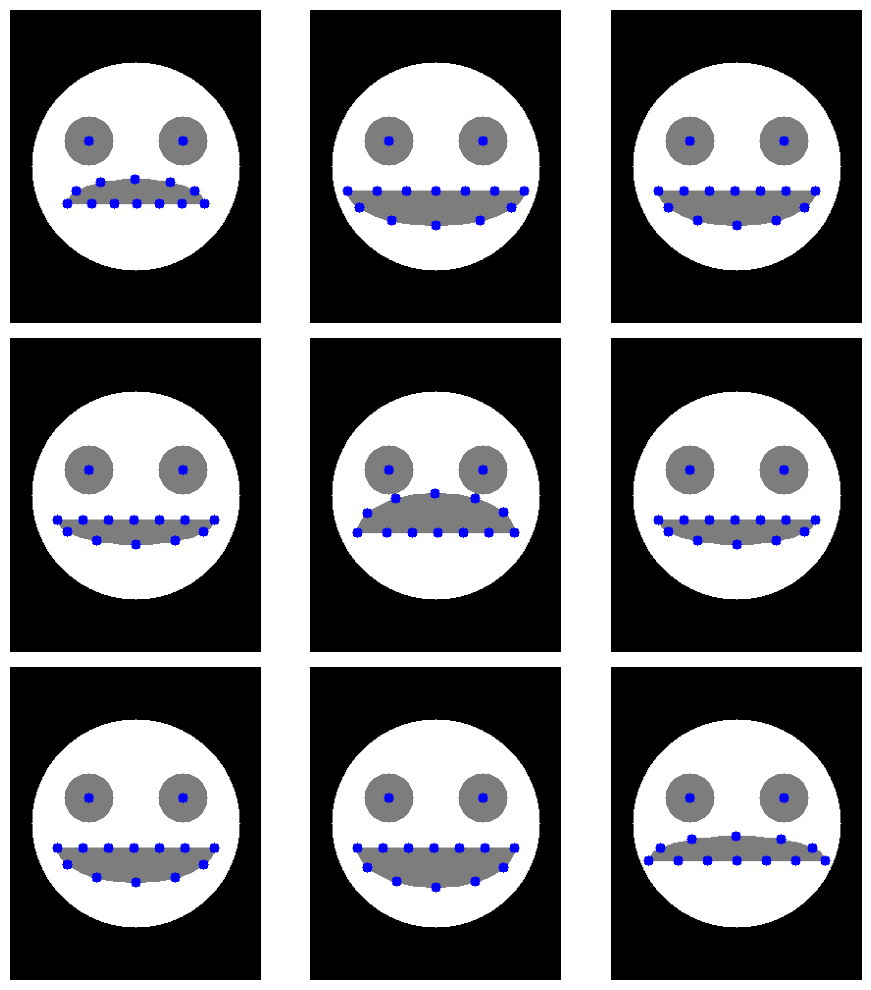

In [16]:
size = (320, 256)

def generate_smiley_face(size, num_faces):
  faces = []
  angles = []

  mouthCenter = (int(size[0] // 2), int(size[0] // 2 + size[1] * 0.1))
  for i in range(num_faces):
    center = (size[1] // 2, size[0] // 2)
    angle = random.choice([0 , 180]) 
    if angle == 180:
      mouthCenter = (int(center[0]), int(center[1] + size[1] * 0.15))
    else:
      mouthCenter = (int(center[0]), int(center[1] + size[1] * 0.1))
    axis1 = random.choice([70, 80, 90])
    axis2 = random.choice([25, 35, 40 ])
    image = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    imageCircle = cv2.circle(image, center, size[0] // 3, (255, 255, 255), -1)
    imageLeftEye = cv2.circle(imageCircle, center=(int(center[0] - size[0] * 0.15), int(center[1] - size[1] * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
    imageRightEye = cv2.circle(imageLeftEye, center=(int(center[0] + size[0] * 0.15), int(center[1] - size[1] * 0.1)), radius=25, color=(125, 125, 125), thickness=-1)
    # imageNose = cv2.circle(imageRightEye, center=(int(center[0]), int(center[1])), radius=10, color=(125, 125, 125), thickness=-1)
    
    imageMouth = cv2.ellipse(img = imageRightEye, center = mouthCenter, 
                             axes = (axis1, axis2), angle = angle, startAngle = 0, 
                             endAngle = 180, color = (125, 125, 125), thickness = -1)
    

    angles.append(angle)
    

    # image_with_landmarks, landmarks = add_landmarks_for_face(imageMouth, center, mouthCenter, axis1, axis2, angle, size)
    landmarks ,imageMouth1 = add_landmarks_for_face(imageMouth, center, mouthCenter, axis1, axis2, angle, size)
    # np.save(f"./data/landmarks/smiley_face{i}.npy", landmarks)
    noisy_image = cv2.GaussianBlur(imageMouth, (5, 5), 0)
    # cv2.imwrite(f"./data/noisy_face/smiley_face{i}.png", noisy_image)

    # # print(landmarks)
    faces.append(imageMouth1)
    # cv2.imwrite(f"./data/smiley_faces/smiley_face{i}.png", imageMouth)
    # # faces_with_points.append(image_with_landmarks)
    # # print(image_with_landmarks.shape)
    # mask = create_mask(landmarks[0], landmarks[1], landmarks[2:], size)
    # #mask = mask * 255
    # # plt.imshow(mask)
    # # plt.axis('off')
    # # plt.show()
    # np.save(f"./data/masks/smiley_face{i}.npy", mask)
    # cv2.imwrite(f"./data/masksPng/smiley_face{i}.png", mask)
    # # break

  # np.save(f"./data/angles/allangles.npy", angles)
  return faces


faces = generate_smiley_face(size, 100)



plt.figure(figsize=(10, 10))
for i, face in enumerate(faces):
  plt.subplot(3, 3, i + 1)
  plt.imshow(face)
  plt.axis('off')
  plt.tight_layout()

# plt.show()



In [42]:
# plt.figure(figsize=(10, 10))
# for i, face in enumerate(faces):
#   plt.subplot(3, 3, i + 1)
#   plt.imshow(face)
#   plt.axis('off')
#   plt.tight_layout()

# plt.show()


In [15]:
angles = np.load(f"./data/angles/allangles.npy")
print(angles.shape)
print(angles)

# if 180 convert to 1 else 0
angles = np.where(angles == 180, 1, 0)
print(angles)

(100,)
[180   0 180   0 180   0 180 180 180 180   0   0 180 180 180 180   0 180
   0 180 180   0 180   0   0   0   0 180 180 180 180 180 180 180   0   0
 180   0 180   0 180 180 180 180   0   0   0   0   0   0 180   0   0   0
 180 180 180 180 180 180   0 180   0   0   0 180 180 180 180   0   0   0
 180   0 180   0   0   0   0   0   0   0   0 180   0   0 180   0   0   0
 180 180 180 180 180   0   0 180   0   0]
[1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0]


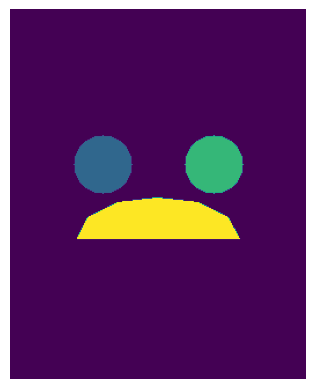

In [9]:
mask = np.load(f"./data/masks/smiley_face0.npy")

plt.imshow(mask)
plt.axis('off')
plt.show()

In [10]:
image = cv2.imread(f"./data/train/Images/smiley_face1.png")
imnp = np.array(image)
print(imnp.shape)



(320, 256, 3)


In [11]:
landmarks = np.load(f"./data/train/landmarks/smiley_face0.npy")
print(len(landmarks))
print(landmarks.shape)
print(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)
print(landmarks.shape)
print(landmarks)


14
(14, 2)
[[ 80 134]
 [176 134]
 [208 185]
 [197 205]
 [168 219]
 [128 225]
 [ 88 219]
 [ 58 205]
 [ 48 185]
 [ 74 185]
 [100 185]
 [126 185]
 [152 185]
 [178 185]]
(14, 2)
[[ 80. 134.]
 [176. 134.]
 [208. 185.]
 [197. 205.]
 [168. 219.]
 [128. 225.]
 [ 88. 219.]
 [ 58. 205.]
 [ 48. 185.]
 [ 74. 185.]
 [100. 185.]
 [126. 185.]
 [152. 185.]
 [178. 185.]]


In [51]:
landmarks = np.load(f"../../HybridGNet/Datasets/JSRT/Train/landmarks/JPCLN002.npy")
print(len(landmarks))
print(landmarks.shape)
print(landmarks)
# landmarks = landmarks.astype('float').reshape(-1, 2)
# print(landmarks.shape)
# print(landmarks)

332
(332,)
[364.      97.     331.952  108.     299.905  133.095  267.857  153.143
 249.     185.19   233.762  217.238  226.     249.286  222.     281.333
 215.619  313.381  206.571  345.429  197.     377.476  193.     409.524
 184.429  441.571  179.     473.619  175.     505.667  173.     537.714
 167.238  569.762  160.     601.81   156.     633.857  158.     665.905
 158.     697.952  157.     730.     175.5    698.5    199.     671.
 230.5    660.     262.     657.     293.5    654.     325.     659.
 356.5    670.5    388.     685.     365.     642.333  362.     599.667
 367.     557.     382.667  514.333  385.     471.667  395.     429.
 412.667  386.333  435.     343.667  449.     301.     454.     258.333
 459.     215.667  454.     173.     440.     130.333  406.667   97.
 665.      86.     698.429  103.429  731.857  127.857  761.     161.286
 781.     194.714  790.     228.143  801.571  261.571  811.     295.
 822.429  328.429  829.     361.857  836.286  395.286  842.     428.

In [95]:
imagelung = cv2.imread(f"../../HybridGNet/Datasets/JSRT/Train/Images/JPCLN002.png")
imnplung = np.array(imagelung)
print(imnplung.shape)

(1024, 1024, 3)


In [38]:
from skimage import io
image = io.imread("../../HybridGNet/Datasets/JSRT/Train/Images/JPCLN002.png").astype('float') / 255.0
print (image.shape)


(1024, 1024)


In [43]:
image = io.imread("./data/train/Images/smiley_face0.png", as_gray= True).astype('float') 
print (image.shape)

(400, 400)
